# Pymaceuticals Analysis

* The drugs Capomulin and Ramicane were the only 2 drugs successful in reducing the tumor sizes, with approximately 20% reduction in size.

* Capomulin also had the lowest spread of metastatic cancer amongst the 4 drugs that were observed, averaging 1.5 metastatic sites. It also had the highest survival rate of those observed, across the entire course of treatment.

* Throughout the entire 45 days, the placebo resulted in the highest number of metastatic sites at nearly all timepoints, resulting in an average of 3.3. Ketapril had the highest average number of met. sites at the final timepoint: 3.4.

* Ketapril also resulted in higher tumor growth than the placebo, which may or may not be significant or causative.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "05-Matplotlib_Homework_Pymaceuticals_data_mouse_drug_data.csv"
clinical_trial_data_to_load = "05-Matplotlib_Homework_Pymaceuticals_data_clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_info = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_info, trial_data, on = "Mouse ID")

# Display the data table for preview

from pprint import pprint

combined_data.head()
#combined_data.to_csv('Combined Data.csv')
pprint(combined_data.to_html())

('<table border="1" class="dataframe">\n'
 '  <thead>\n'
 '    <tr style="text-align: right;">\n'
 '      <th></th>\n'
 '      <th>Mouse ID</th>\n'
 '      <th>Drug</th>\n'
 '      <th>Timepoint</th>\n'
 '      <th>Tumor Volume (mm3)</th>\n'
 '      <th>Metastatic Sites</th>\n'
 '    </tr>\n'
 '  </thead>\n'
 '  <tbody>\n'
 '    <tr>\n'
 '      <th>0</th>\n'
 '      <td>f234</td>\n'
 '      <td>Stelasyn</td>\n'
 '      <td>0</td>\n'
 '      <td>45.000000</td>\n'
 '      <td>0</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1</th>\n'
 '      <td>f234</td>\n'
 '      <td>Stelasyn</td>\n'
 '      <td>5</td>\n'
 '      <td>47.313491</td>\n'
 '      <td>0</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>2</th>\n'
 '      <td>f234</td>\n'
 '      <td>Stelasyn</td>\n'
 '      <td>10</td>\n'
 '      <td>47.904324</td>\n'
 '      <td>0</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>3</th>\n'
 '      <td>f234</td>\n'
 '      <td>Stelasyn</td>\n'
 '      <td>15</td>\n'
 '      <td>48.735197</t

 '      <th>309</th>\n'
 '      <td>l725</td>\n'
 '      <td>Naftisol</td>\n'
 '      <td>5</td>\n'
 '      <td>48.736319</td>\n'
 '      <td>1</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>310</th>\n'
 '      <td>l725</td>\n'
 '      <td>Naftisol</td>\n'
 '      <td>10</td>\n'
 '      <td>50.823912</td>\n'
 '      <td>2</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>311</th>\n'
 '      <td>l725</td>\n'
 '      <td>Naftisol</td>\n'
 '      <td>15</td>\n'
 '      <td>54.244563</td>\n'
 '      <td>2</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>312</th>\n'
 '      <td>l725</td>\n'
 '      <td>Naftisol</td>\n'
 '      <td>20</td>\n'
 '      <td>59.615155</td>\n'
 '      <td>2</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>313</th>\n'
 '      <td>l725</td>\n'
 '      <td>Naftisol</td>\n'
 '      <td>25</td>\n'
 '      <td>65.008829</td>\n'
 '      <td>2</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>314</th>\n'
 '      <td>l725</td>\n'
 '      <td>Naftisol</td>\n'
 '      <td>3

 '    </tr>\n'
 '    <tr>\n'
 '      <th>576</th>\n'
 '      <td>u327</td>\n'
 '      <td>Ketapril</td>\n'
 '      <td>30</td>\n'
 '      <td>57.314072</td>\n'
 '      <td>0</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>577</th>\n'
 '      <td>u327</td>\n'
 '      <td>Ketapril</td>\n'
 '      <td>35</td>\n'
 '      <td>58.089028</td>\n'
 '      <td>1</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>578</th>\n'
 '      <td>u327</td>\n'
 '      <td>Ketapril</td>\n'
 '      <td>40</td>\n'
 '      <td>60.466545</td>\n'
 '      <td>1</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>579</th>\n'
 '      <td>u327</td>\n'
 '      <td>Ketapril</td>\n'
 '      <td>45</td>\n'
 '      <td>66.268801</td>\n'
 '      <td>2</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>580</th>\n'
 '      <td>h428</td>\n'
 '      <td>Ketapril</td>\n'
 '      <td>0</td>\n'
 '      <td>45.000000</td>\n'
 '      <td>0</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>581</th>\n'
 '      <td>b128</td>\n'
 '      <td>C

 '      <td>40</td>\n'
 '      <td>64.138725</td>\n'
 '      <td>3</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>872</th>\n'
 '      <td>k483</td>\n'
 '      <td>Infubinol</td>\n'
 '      <td>45</td>\n'
 '      <td>66.196912</td>\n'
 '      <td>3</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>873</th>\n'
 '      <td>y163</td>\n'
 '      <td>Infubinol</td>\n'
 '      <td>0</td>\n'
 '      <td>45.000000</td>\n'
 '      <td>0</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>874</th>\n'
 '      <td>y163</td>\n'
 '      <td>Infubinol</td>\n'
 '      <td>5</td>\n'
 '      <td>48.284970</td>\n'
 '      <td>0</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>875</th>\n'
 '      <td>y163</td>\n'
 '      <td>Infubinol</td>\n'
 '      <td>10</td>\n'
 '      <td>49.112399</td>\n'
 '      <td>1</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>876</th>\n'
 '      <td>y163</td>\n'
 '      <td>Infubinol</td>\n'
 '      <td>15</td>\n'
 '      <td>51.523068</td>\n'
 '      <td>1</td>\n'
 '    </tr>\

 '    </tr>\n'
 '    <tr>\n'
 '      <th>1184</th>\n'
 '      <td>v991</td>\n'
 '      <td>Propriva</td>\n'
 '      <td>40</td>\n'
 '      <td>64.851129</td>\n'
 '      <td>4</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1185</th>\n'
 '      <td>v991</td>\n'
 '      <td>Propriva</td>\n'
 '      <td>45</td>\n'
 '      <td>70.167749</td>\n'
 '      <td>4</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1186</th>\n'
 '      <td>o562</td>\n'
 '      <td>Propriva</td>\n'
 '      <td>0</td>\n'
 '      <td>45.000000</td>\n'
 '      <td>0</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1187</th>\n'
 '      <td>o562</td>\n'
 '      <td>Propriva</td>\n'
 '      <td>5</td>\n'
 '      <td>46.514950</td>\n'
 '      <td>1</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1188</th>\n'
 '      <td>o562</td>\n'
 '      <td>Propriva</td>\n'
 '      <td>10</td>\n'
 '      <td>47.147670</td>\n'
 '      <td>1</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1189</th>\n'
 '      <td>o562</td>\n'
 '      

 '      <td>Zoniferol</td>\n'
 '      <td>5</td>\n'
 '      <td>47.717952</td>\n'
 '      <td>0</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1497</th>\n'
 '      <td>i334</td>\n'
 '      <td>Ramicane</td>\n'
 '      <td>0</td>\n'
 '      <td>45.000000</td>\n'
 '      <td>0</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1498</th>\n'
 '      <td>i334</td>\n'
 '      <td>Ramicane</td>\n'
 '      <td>5</td>\n'
 '      <td>41.020518</td>\n'
 '      <td>0</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1499</th>\n'
 '      <td>i334</td>\n'
 '      <td>Ramicane</td>\n'
 '      <td>10</td>\n'
 '      <td>41.631247</td>\n'
 '      <td>0</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1500</th>\n'
 '      <td>i334</td>\n'
 '      <td>Ramicane</td>\n'
 '      <td>15</td>\n'
 '      <td>39.158001</td>\n'
 '      <td>0</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1501</th>\n'
 '      <td>i334</td>\n'
 '      <td>Ramicane</td>\n'
 '      <td>20</td>\n'
 '      <td>39.687832</td>\n'
 '   

 '      <td>Placebo</td>\n'
 '      <td>15</td>\n'
 '      <td>55.886338</td>\n'
 '      <td>2</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1808</th>\n'
 '      <td>o795</td>\n'
 '      <td>Placebo</td>\n'
 '      <td>20</td>\n'
 '      <td>60.610059</td>\n'
 '      <td>3</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1809</th>\n'
 '      <td>o795</td>\n'
 '      <td>Placebo</td>\n'
 '      <td>25</td>\n'
 '      <td>65.741777</td>\n'
 '      <td>4</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1810</th>\n'
 '      <td>o795</td>\n'
 '      <td>Placebo</td>\n'
 '      <td>30</td>\n'
 '      <td>68.217070</td>\n'
 '      <td>4</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1811</th>\n'
 '      <td>o795</td>\n'
 '      <td>Placebo</td>\n'
 '      <td>35</td>\n'
 '      <td>69.085094</td>\n'
 '      <td>4</td>\n'
 '    </tr>\n'
 '    <tr>\n'
 '      <th>1812</th>\n'
 '      <td>o795</td>\n'
 '      <td>Placebo</td>\n'
 '      <td>40</td>\n'
 '      <td>70.266479</td>\n'
 '      <

## Tumor Response to Treatment

In [15]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

drug_timepoint_group = combined_data.groupby(['Drug', 'Timepoint'])

mean_tumor_volume = drug_timepoint_group.mean()['Tumor Volume (mm3)']

# Convert to DataFrame

mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame

mean_tumor_volume_df = mean_tumor_volume_df.reset_index()

mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [16]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sem_tumor = drug_timepoint_group.sem()['Tumor Volume (mm3)']

# Convert to DataFrame

sem_tumor_df = pd.DataFrame(sem_tumor).rename(columns = {'Tumor Volume (mm3)' : 'Standard Error in Tumor Volume'})

# Preview DataFrame

sem_tumor_df = sem_tumor_df.reset_index()

sem_tumor_df.head(20)

,Drug,Timepoint,Standard Error in Tumor Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [17]:
# Minor Data Munging to Re-Format the Data Frames

pivot_mean_tumor_volume_df = mean_tumor_volume_df.pivot(index="Timepoint", columns="Drug", values='Tumor Volume (mm3)')

pivot_sem_tumor_df = sem_tumor_df.pivot(index="Timepoint", columns="Drug", values='Standard Error in Tumor Volume')

# Preview that Reformatting worked

pivot_mean_tumor_volume_df

pivot_sem_tumor_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


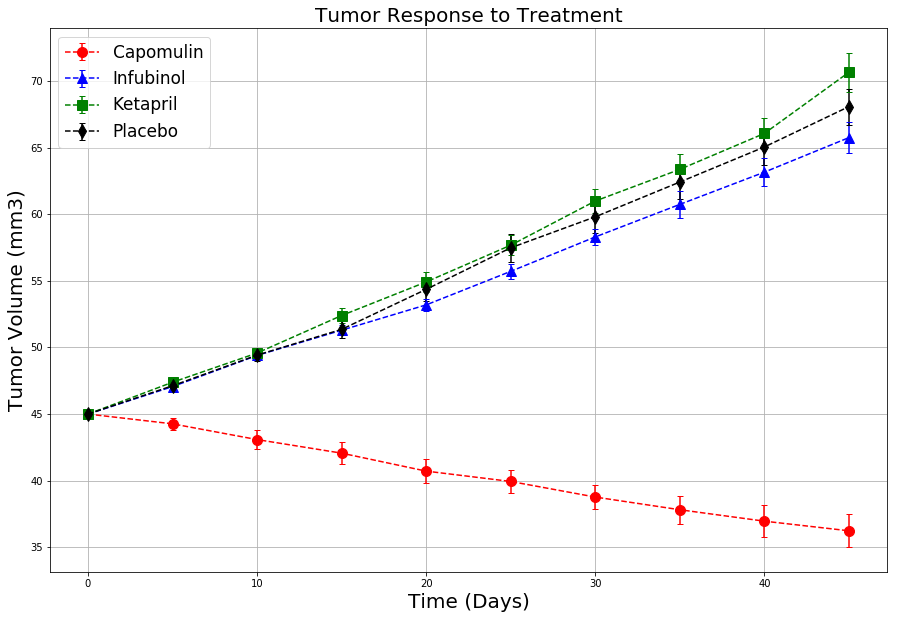

In [96]:
# Generate the Plot (with Error Bars)

drug = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

color = ['r', 'b', 'g', 'k']

marker = ['o', '^', 's', 'd']

drug_zip = zip(drug, color, marker) #tuple  with [(drug1, color1, marker1), (drug2, color2, marker2),....]

plt.figure(figsize = (15, 10))
plt.grid()

# Loop through tuples (from zip) in order to plot points for selected drugs - with error bars

for drug, color, marker in drug_zip:
    plt.errorbar(pivot_mean_tumor_volume_df.index,     # x-values from index (timepoint is the index)
                 pivot_mean_tumor_volume_df[drug],     # y-values from tumor volume of that drug
                 yerr = pivot_sem_tumor_df[drug],      # standard error for that drug
                 color = color,                        # color from zipped tuples
                 marker = marker,                      # marker from zipped tuples
                 linestyle = '--', 
                 capthick = 1,                         # for caps on error bars
                 capsize = 3,
                 markersize = 10)
    

plt.title('Tumor Response to Treatment', fontsize = 20)
plt.xlabel('Time (Days)', fontsize = 20)
plt.ylabel('Tumor Volume (mm3)', fontsize = 20)
plt.legend(loc = 'best', fontsize = 17)

# Save the Figure

plt.savefig('Tumor Response to Treatment.png')

In [19]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [20]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_metsite_data = drug_timepoint_group.mean()['Metastatic Sites']

# Convert to DataFrame

mean_metsite_data_df = pd.DataFrame(mean_metsite_data)

# Preview DataFrame

mean_metsite_data_df = mean_metsite_data_df.reset_index()

mean_metsite_data_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [83]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

sem_metsites = drug_timepoint_group.sem()['Metastatic Sites']

# Convert to DataFrame

sem_metsites_df = pd.DataFrame(sem_metsites).rename(columns = {'Metastatic Sites' : 'Standard Error in Metastatic Sites'})

# Preview DataFrame

sem_metsites_df = sem_metsites_df.reset_index()

sem_metsites_df.head(20)

,Drug,Timepoint,Standard Error in Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [99]:
# Minor Data Munging to Re-Format the Data Frames

pivot_mean_metsite_data_df = mean_metsite_data_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

pivot_sem_metsites_df = sem_metsites_df.pivot(index='Timepoint', columns='Drug', values= 'Standard Error in Metastatic Sites')

# Preview that Reformatting worked

pivot_mean_metsite_data_df
#pivot_sem_metsites_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


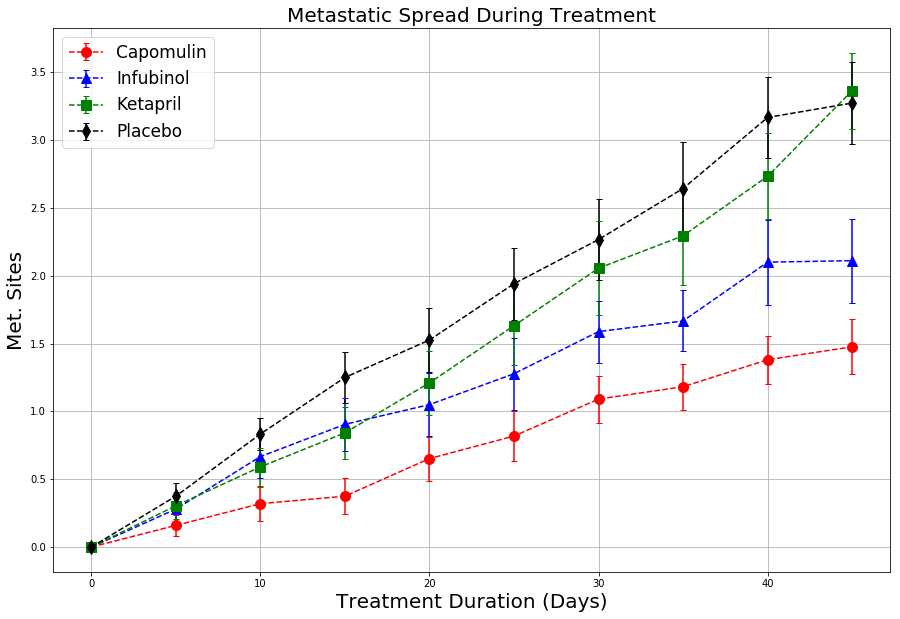

In [97]:
# Generate the Plot (with Error Bars)

drug = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

color = ['r', 'b', 'g', 'k']

marker = ['o', '^', 's', 'd']

drug_zip = zip(drug, color, marker) #tuple  with [(drug1, color1, marker1), (drug2, color2, marker2),....]

plt.figure(figsize = (15, 10))
plt.grid()

# Loop through tuples (from zip) in order to plot points for selected drugs - with error bars

for drug, color, marker in drug_zip:
    plt.errorbar(pivot_mean_metsite_data_df.index,         # x-values from index (timepoint is the index)
                 pivot_mean_metsite_data_df[drug],         # y-values from tumor volume of that drug
                 yerr = pivot_sem_metsites_df[drug],       # standard error for that drug
                 color = color,                            # color from zipped tuples
                 marker = marker,                          # marker from zipped tuples
                 linestyle = '--',
                 capthick = 1,                             # for caps on error bars
                 capsize = 3,
                 markersize = 10)
    
    
plt.title('Metastatic Spread During Treatment', fontsize = 20)
plt.xlabel('Treatment Duration (Days)', fontsize = 20)
plt.ylabel('Met. Sites', fontsize = 20)
plt.legend(loc = 'best', fontsize = 17)

# Save the Figure

plt.savefig('Metastatic Spread During Treatment.png')

# Show the Figure
plt.show()

## Survival Rates

In [26]:
# Store the Count of Mice Grouped by Drug and Timepoint

df = drug_timepoint_group.count().reset_index()

# Grab only necessary columns and rename Mouse ID column
mice_count_df = df.iloc[:, 0:3]
mice_count_df = mice_count_df.rename(columns = {"Mouse ID" : "Mouse Count"})

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [27]:
# Minor Data Munging to Re-Format the Data Frames

mice_count_df = mice_count_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Count')

# Preview the Data Frame

mice_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


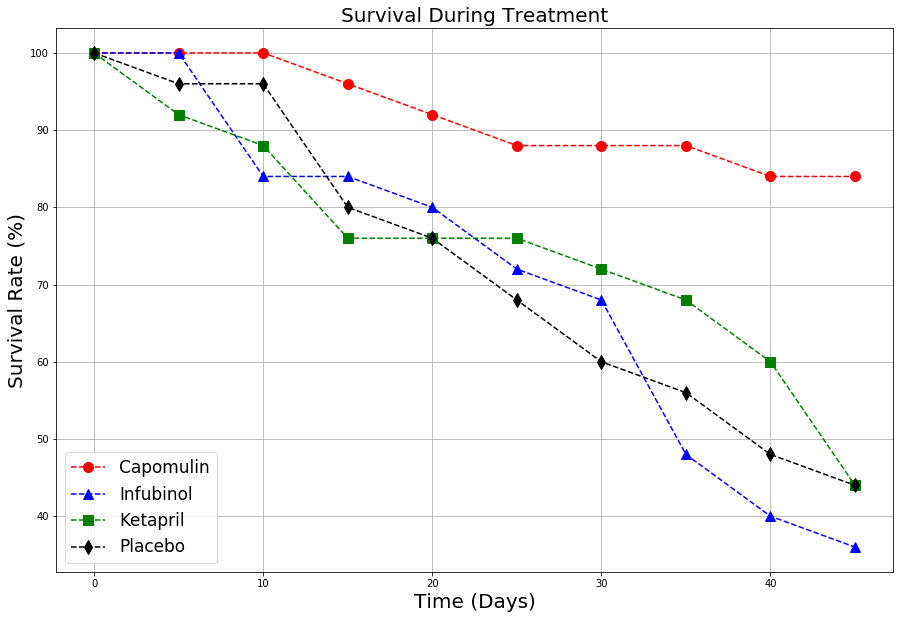

In [100]:
# Generate the Plot (Accounting for percentages)

color = ['r', 'b', 'g', 'k']

marker = ['o', '^', 's', 'd']

plt.figure(figsize = (15, 10))
plt.grid()

# Initialize count for 'color' and 'marker' lists to use in loop below
count = 0

# Loop through drug columns in mice_count_df to plot points

for t in mice_count_df.iloc[:, [0, 2, 3, 5]]:                        # selects only those 4 drug columns
    
    survival_rate = mice_count_df[t]/mice_count_df.loc[0,t] * 100    # calculates survival rate for each timepoint
    
    plt.plot(mice_count_df.index,                                    # x-values from index (timepoint is the index)
             survival_rate,                                          # y-values are the survival rate for that timepoint
            color = color[count],                                    # selecting the color from the list of colors
            marker = marker[count],                                  # selecting the marker from the list of markers
            linestyle = '--',
            markersize = 10)
    
    count += 1          # incrementing the count for the next iteration, so that the next color and marker will be selected
    
plt.title('Survival During Treatment', fontsize = 20)
plt.xlabel('Time (Days)', fontsize = 20)
plt.ylabel('Survival Rate (%)', fontsize = 20)
plt.legend(loc = 3, fontsize = 17)              # location 3 designates it at lower left of figure

# Save the Figure

plt.savefig('Survival During Treatment.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [34]:
# Calculate the percent changes for each drug

percent_changes = ((pivot_mean_tumor_volume_df.iloc[-1] - pivot_mean_tumor_volume_df.iloc[0]) / pivot_mean_tumor_volume_df.iloc[0]) * 100

# Display the data to confirm

percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

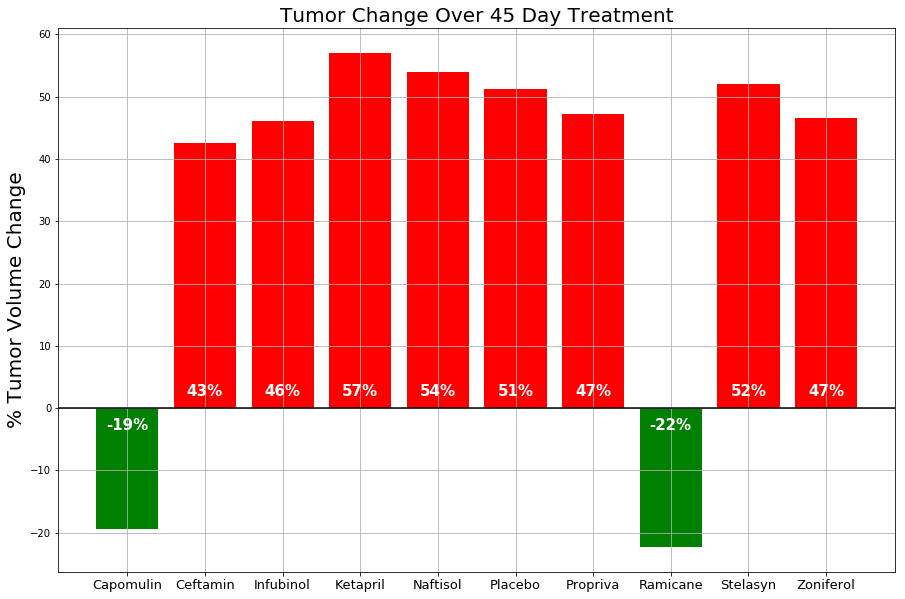

In [82]:
# Splice the data between passing and failing drugs: make list of colors according to their + or - change

colors = []

for p in percent_changes:
    if p < 0:
        colors.append('green')
    else:
        colors.append('red')

# Plot figure and add labels & other chart attributes

plt.figure(figsize = (15, 10))
plt.grid()

    
plt.bar(percent_changes.index,                  # x-values from index (timepoint is the index)
         percent_changes,                       # y-values from percent changes
        color = colors)                         # list of colors


plt.title('Tumor Change Over 45 Day Treatment', fontsize = 20)
plt.ylabel('% Tumor Volume Change', fontsize = 20)
plt.axhline(y=0, color = 'black')               # adds horizontal line across the whole axis
plt.xticks(fontsize = 13)                       # increases the font size of the x-labels to make them more legible


# Initialize the count for the loop below
count = 0

# Label bars with percent values using a loop
for p in percent_changes:
    if p < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    
    plt.text(count, y_coor, str(round(p)) + '%', ha = 'center', color = 'white', fontsize = 15, fontweight = 'bold')
    
    count+=1     # incrementing the count for the next iteration, so that the next x-value will be selected

    
# Save the Figure
plt.savefig('Tumor Changes - Percent.png')


# Show the Figure
plt.show()